## 鸢尾花数据集处理

**---sklearn 自带库和算法的使用**

### 导入数据

In [1]:
#导入内置的鸢尾花数据
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
 
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [2]:
#导入所需包
import seaborn as sns #数据可视化
import matplotlib.pyplot as plt #绘图
import pandas as pd #数据分析

from sklearn.model_selection import train_test_split #数据划分
from sklearn.preprocessing import StandardScaler #数据标准化

from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.neighbors import KNeighborsClassifier #K近邻分类
from sklearn.svm import SVC #支持向量机
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.metrics import accuracy_score 

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN #聚类库
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score #K折交叉验证
from sklearn.model_selection import GridSearchCV #超参数调优-网格搜索

### 数据预处理

In [3]:
#数据集属性描述
print("特征值：\n",iris.data)
print("目标值：\n",iris["target"])
print("特征值名字：\n",iris.feature_names)
print("目标值名字：\n",iris.target_names)
print("数据集描述：\n",iris.DESCR)

特征值：
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 

In [4]:
iris_d = pd.DataFrame(data=iris.data,columns=['sepal length', 'sepal width', 'petal length', 'petal width'])

In [5]:
iris_d

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
#查看数据类型信息
iris_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### 数据可视化

In [7]:
iris_d["target"] = iris.target

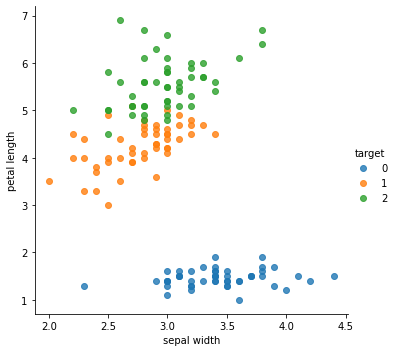

In [8]:
#定义函数iris_plot，定义三个变量
#使用seaborn进行数据可视化，对应函数变量第一位为数据，第二位为横轴名，第三位为纵轴名
def iris_plot(data,col1,col2):
    sns.lmplot(x=col1,y=col2,data=data,hue="target",fit_reg=False)
    plt.show()#显示可视化图表

#使用数据为iris_d，横轴为名为sepal width,纵轴名为petal length
iris_plot(iris_d,'sepal width','petal length')

### 数据划分

In [9]:
#定义数据、标签
X = iris.data
y = iris.target

#进行数据划分
X_train, X_test, y_train, y_test = train_test_split(X
                                                    ,y
                                                    ,random_state=42
                                                    #,stratify=y
                                                    ,test_size=0.3
                                                    #,shuffle=True
                                                    )
#将完整数据集的70%作为训练集，30%作为测试集，
#可通过使得设置 stratify=y 测试集和训练集中各类别数据的比例与原始数据集比例一致(stratify分层策略)
#可通过设置 shuffle=True 提前打乱数据

In [10]:
print("训练集的目标值形状：\n",y_train.shape)
print("测试集的目标值形状：\n",y_test.shape)

训练集的目标值形状：
 (105,)
测试集的目标值形状：
 (45,)


### 数据转换

In [11]:
#构建转换器实例
scaler = StandardScaler( )
 
#拟合及转换
scaler.fit_transform(X_train)
X_scaled = scaler.fit_transform(X)

### 监督学习算法-分类

In [12]:
# 1. 逻辑回归
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"逻辑回归分类准确率: {accuracy_logistic:.2f}")

逻辑回归分类准确率: 1.00


In [13]:
# 2. K近邻（KNN）
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K近邻分类准确率: {accuracy_knn:.2f}")

K近邻分类准确率: 1.00


In [14]:
# 3. 支持向量机
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"支持向量机分类准确率: {accuracy_svm:.2f}")

支持向量机分类准确率: 1.00


In [15]:
# 4. 朴素贝叶斯
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"朴素贝叶斯分类准确率: {accuracy_nb:.2f}")

朴素贝叶斯分类准确率: 0.98


In [16]:
# 5. 决策树
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"决策树分类准确率: {accuracy_tree:.2f}")

决策树分类准确率: 1.00


### 无监督学习算法-聚类

In [17]:
# 1. K均值聚类
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred_kmeans = kmeans.fit_predict(X_scaled)
ari_kmeans = adjusted_rand_score(y, y_pred_kmeans)
silhouette_kmeans = silhouette_score(X_scaled, y_pred_kmeans)
print(f"K均值 - Adjusted Rand Index: {ari_kmeans:.2f}, Silhouette Score: {silhouette_kmeans:.2f}")

K均值 - Adjusted Rand Index: 0.62, Silhouette Score: 0.46


In [18]:
# 2. 层次聚类
hierarchical = AgglomerativeClustering(n_clusters=3)
y_pred_hierarchical = hierarchical.fit_predict(X_scaled)
ari_hierarchical = adjusted_rand_score(y, y_pred_hierarchical)
silhouette_hierarchical = silhouette_score(X_scaled, y_pred_hierarchical)
print(f"层次聚类 - Adjusted Rand Index: {ari_hierarchical:.2f}, Silhouette Score: {silhouette_hierarchical:.2f}")

层次聚类 - Adjusted Rand Index: 0.62, Silhouette Score: 0.45


In [19]:
# 3. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X_scaled)
# 由于DBSCAN的标签中可能有-1（表示噪声），需过滤掉噪声点计算ARI和轮廓系数
ari_dbscan = adjusted_rand_score(y, y_pred_dbscan)
if len(set(y_pred_dbscan)) > 1:  # 如果存在多个簇
    silhouette_dbscan = silhouette_score(X_scaled, y_pred_dbscan)
else:
    silhouette_dbscan = -1  # 如果只有一个簇或噪声
print(f"DBSCAN - Adjusted Rand Index: {ari_dbscan:.2f}, Silhouette Score: {silhouette_dbscan:.2f}")

DBSCAN - Adjusted Rand Index: 0.44, Silhouette Score: 0.36


### 交叉验证
**以KNN为例，使用K折交叉验证 (K=5)**

In [20]:
# 使用准确率作为评估标准
scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

# 输出交叉验证的平均准确率和标准差
print(f"KNN - 交叉验证准确率: {scores.mean():.2f} ± {scores.std():.2f}")

KNN - 交叉验证准确率: 0.97 ± 0.02


In [21]:
# 使用加权F1得分作为评估标准
scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')

# 输出加权F1得分的平均值和标准差
print(f"KNN - 加权F1得分: {scores.mean():.2f} ± {scores.std():.2f}")

KNN - 加权F1得分: 0.97 ± 0.03


### 超参数调优
**以KNN为例**

In [22]:
# 定义需要调优的超参数范围，把超参数集合作为字典
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # K值（邻居数）
    'weights': ['uniform', 'distance'],  # 权重
    'p': [1, 2]  # p=1 曼哈顿距离, p=2 欧几里得距离
}

# 使用网格搜索与K折交叉验证结合
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# 输出最佳参数和对应的交叉验证得分
print(f"最佳超参数组合: {grid_search.best_params_}")
print(f"最佳交叉验证准确率: {grid_search.best_score_:.2f}")

最佳超参数组合: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
最佳交叉验证准确率: 0.99
